Import the relevent libraries
Pandas package for loading and preprocessing the dataset

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

Read the training dateset

In [97]:
#ALso remember to parse the date column. This will be helpful in the next step
training_data=pd.read_csv('Arundo_take_home_challenge_training_set.csv',sep=',',parse_dates=['date'])
#Have a look at the data
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog


Let us try to get a better insight into the data. We use violin plot for dependence on the categorical variables (https://blog.modeanalytics.com/violin-plot-examples/)

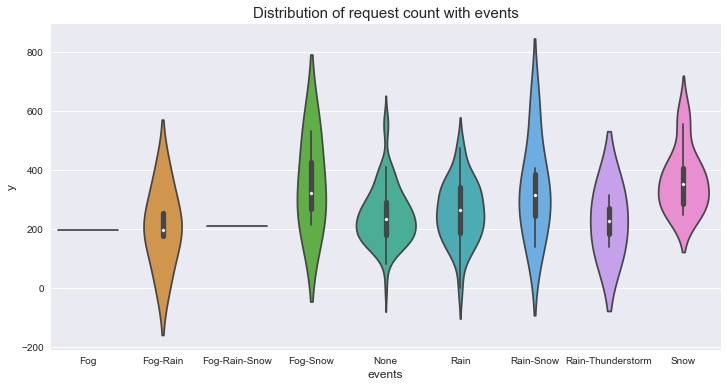

In [98]:
var_name = "events"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

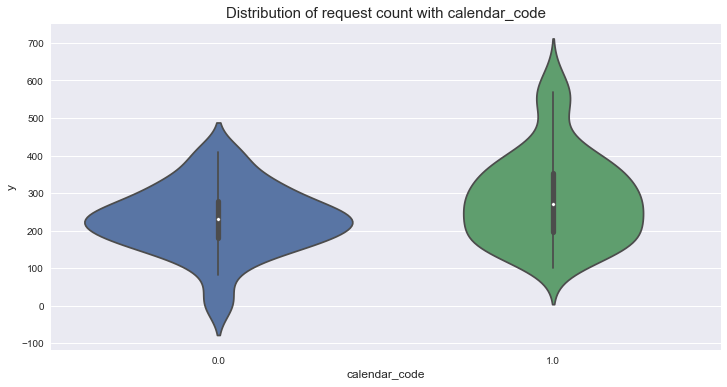

In [99]:
var_name = "calendar_code"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

The date as such is not as important. May be the site maintenence is dependant on the working day or weekend. We add an additional column with the week day (0: Monday, ... 6: Sunday)

In [100]:
training_data['day_of_week'] = training_data['date'].dt.dayofweek
training_data['week_day'] = training_data['date'].dt.weekday_name
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,week_day
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,Monday
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,Tuesday
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,Wednesday
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,Thursday
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,Friday


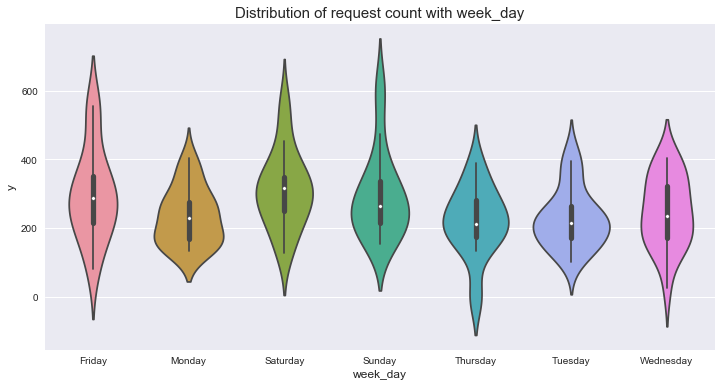

In [101]:
var_name = "week_day"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

Next we convert the events into some unique identifiers (integers). This will result in an additional column "events_code"

In [102]:
training_data['events_code'] = pd.Categorical(training_data["events"]).codes
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,week_day,events_code
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,Monday,5
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,Tuesday,7
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,Wednesday,4
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,Thursday,4
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,Friday,0


Since request count is the target variable, we store it separately as "y"

In [103]:
y=training_data["request_count"]
print("Shape of y ",y.shape)

Shape of y  (152,)


Drop the redundant columns now "date","events","request_count"

In [104]:
training_data = training_data.drop(["date","events","request_count","week_day"],axis=1)
training_data.head()

,calendar_code,site_count,max_temp,min_temp,precipitation,day_of_week,events_code
0,0.0,6,30.6,22.8,0.0,0,5
1,1.0,7,32.8,22.8,15.5,1,7
2,1.0,7,29.4,18.3,0.0,2,4
3,1.0,7,29.4,17.2,0.0,3,4
4,1.0,7,30.6,21.7,0.0,4,0


The categorical values day_of_week, events_code and calender code needs to be one-hot-encoded to be used as a feature input vector. 

In [105]:
training_data= pd.get_dummies(training_data,columns=["calendar_code","events_code","day_of_week"],prefix=["calendar","event","week"])
training_data.head()

,site_count,max_temp,min_temp,precipitation,calendar_0.0,calendar_1.0,event_0,event_1,event_2,event_3,...,event_6,event_7,event_8,week_0,week_1,week_2,week_3,week_4,week_5,week_6
0,6,30.6,22.8,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,32.8,22.8,15.5,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,7,29.4,18.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,29.4,17.2,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,7,30.6,21.7,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Call the feature vectors X

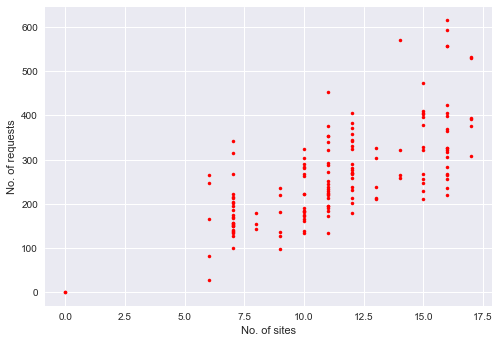

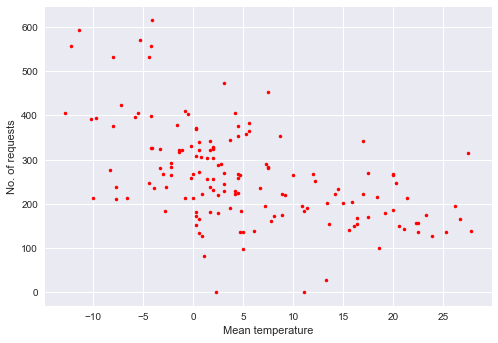

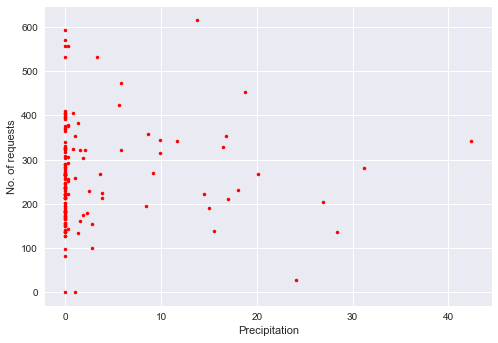

In [106]:
X=training_data.values

plt.figure(1)
plt.plot(X[:,0],y[:],'r.')
plt.xlabel("No. of sites")
plt.ylabel("No. of requests")
plt.show()

plt.figure(1)
plt.plot((X[:,1]+X[:,2])/2.0,y[:],'r.')
plt.xlabel("Mean temperature")
plt.ylabel("No. of requests")
plt.show()

plt.figure(1)
plt.plot(X[:,3],y[:],'r.')
plt.xlabel("Precipitation")
plt.ylabel("No. of requests")
plt.show()

To Do: Better idea willbe to plot histograms

In [107]:
#Split the data into training and validation test
X_train, X_val, y_train, y_val =  train_test_split(X,y,test_size=0.2,random_state = 0)

Conduct a multivariate linear regression on the dataset.

In [108]:
#Multivariabte regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred=regr.predict(X_train)
print("Mean squared error: %.2f" % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean squared error: %.2f" % np.mean((regr.predict(X_val) - y_val) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))
print('Variance score: %.2f' % regr.score(X_val, y_val))

Mean squared error: 2236.26
Mean squared error: 3449.85
Variance score: 0.80
Variance score: 0.77
